In [1]:
from tiny_data_warehouse import DataWarehouse
tdw = DataWarehouse()

df = tdw.event('arxiv_papers')
df

,title,abstract,url,published,tdw_timestamp
0,Panda-70M: Captioning 70M Videos with Multiple...,The quality of the data and annotation upper-b...,http://arxiv.org/abs/2402.19479v1,2024-02-29 18:59:50+00:00,2024-03-02 15:20:28.528195
0,Learning a Generalized Physical Face Model Fro...,Physically-based simulation is a powerful appr...,http://arxiv.org/abs/2402.19477v1,2024-02-29 18:59:31+00:00,2024-03-02 15:20:28.547171
0,The All-Seeing Project V2: Towards General Rel...,We present the All-Seeing Project V2: a new mo...,http://arxiv.org/abs/2402.19474v1,2024-02-29 18:59:17+00:00,2024-03-02 15:20:28.560878
0,Retrieval-Augmented Generation for AI-Generate...,The development of Artificial Intelligence Gen...,http://arxiv.org/abs/2402.19473v1,2024-02-29 18:59:01+00:00,2024-03-02 15:20:28.563475
0,Humanoid Locomotion as Next Token Prediction,We cast real-world humanoid control as a next ...,http://arxiv.org/abs/2402.19469v1,2024-02-29 18:57:37+00:00,2024-03-02 15:20:28.565966
...,...,...,...,...,...
0,Towards Building Child-Centered Machine Learni...,Researchers and policy-makers have started cre...,http://arxiv.org/abs/2304.09532v1,2023-04-19 09:41:27+00:00,2024-05-11 13:36:40.833773
0,An Exploratory Study of V-Model in Building ML...,Machine learning (ML) components are being add...,http://arxiv.org/abs/2308.05381v4,2023-08-10 06:53:32+00:00,2024-05-11 13:36:40.946992
0,Collaborative Machine Learning Model Building ...,Existing novice-friendly machine learning (ML)...,http://arxiv.org/abs/2304.05444v3,2023-04-11 18:31:07+00:00,2024-05-11 13:36:41.061472
0,Towards Linear Algebra over Normalized Data,Providing machine learning (ML) over relationa...,http://arxiv.org/abs/1612.07448v6,2016-12-22 05:41:27+00:00,2024-05-11 13:36:41.175229


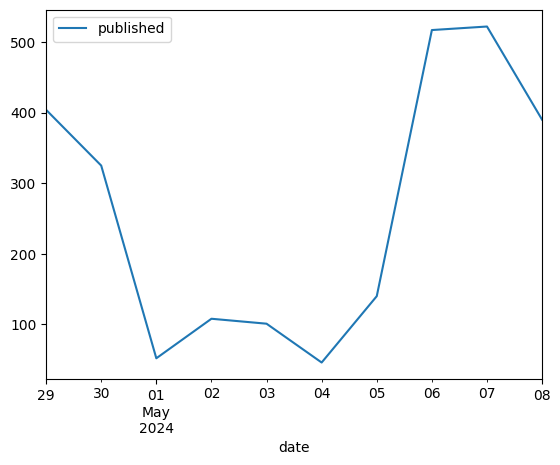

In [3]:
import pandas as pd
def plot_days(n_days):
    new_df = df.groupby(by=df.published.dt.date).agg({'published': 'count'})
    new_df['date'] = new_df.index
    new_df['published_count'] = new_df['published']


    NUM_OF_DAYS = 30
    new_df.reset_index(drop=True, inplace=True)
    new_df = new_df.sort_values(by='date', ascending=False).head(n_days)
    new_df['date'] = pd.to_datetime(new_df['date'])
    new_df.reset_index(drop=True, inplace=True)
    new_df.plot(x='date', y='published')
    
plot_days(10)

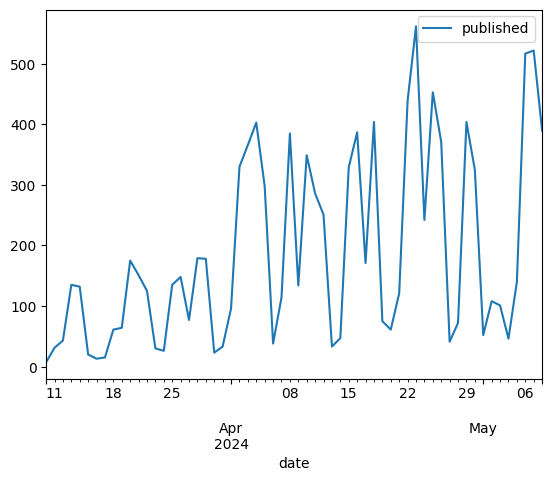

In [4]:
plot_days(60)

In [14]:
(tdw.event('arxiv_papers').duplicated(subset='url', keep='first').sum())

3410